In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

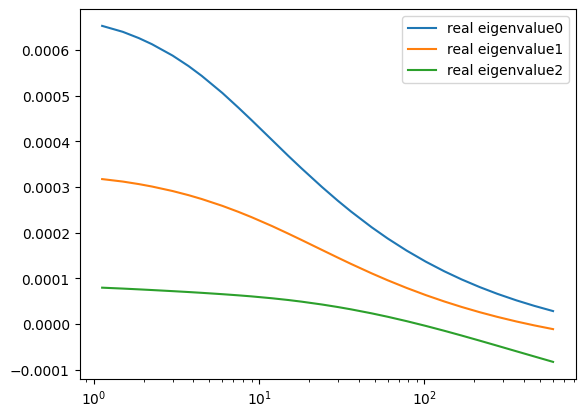

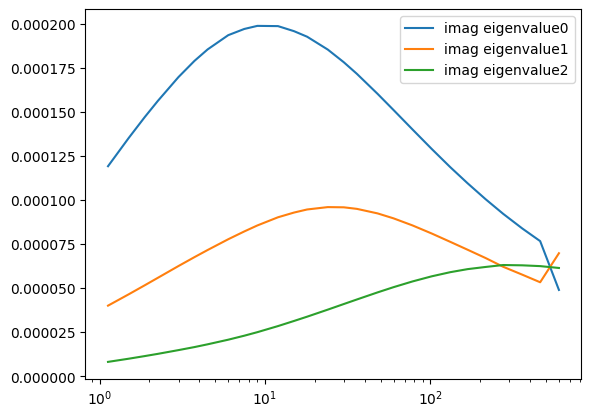

In [2]:
# Read in the eigenvalues
# Note we need to swap first and second eigenvalue,eigenvector pairs from John's measurements
# to obtain a valid Q matrix
# Eigenvalue 1

directory="jd/PR11704/"
object="PR11704"

d = pd.read_csv(directory+object+'_eigenvalue_1.csv')
 
df = d.values
#print(df)
Frequencies = 2*np.pi*df[:,0]
#print(np.shape(Frequencies))
N=len(Frequencies)
LambdaRtilde= np.zeros((N,3))
LambdaI= np.zeros((N,3))
LambdaRtilde[:,0]=df[:,1]
LambdaI[:,0]=df[:,2]

# Eigenvalue 2
d = pd.read_csv(directory+object+'_eigenvalue_2.csv')
 
df = d.values
LambdaRtilde[:,1]=df[:,1]
LambdaI[:,1]=df[:,2]

# Eigenvalue 3
d = pd.read_csv(directory+object+'_eigenvalue_3.csv')
 
df = d.values
LambdaRtilde[:,2]=df[:,1]
LambdaI[:,2]=df[:,2]

plt.figure()
for n in range(3):
    plt.semilogx(Frequencies,LambdaRtilde[:,n],label="real eigenvalue"+str(n))
plt.legend()
plt.show()

plt.figure()
for n in range(3):
    plt.semilogx(Frequencies,LambdaI[:,n],label="imag eigenvalue"+str(n))
plt.legend()
plt.show()


In [3]:
# Read in the eigenvectors
# Added distinct column labels to csv file and removed blank rows and columnns

# Eigenvectors
d = pd.read_csv(directory+object+'_eigenvectors.csv', skip_blank_lines=True )
print(d.keys())

Index(['Frequencies', 'Real 1', 'Real 2', 'Real 3', 'Imaginary 1',
       'Imaginary 2', 'Imaginary 3'],
      dtype='object')


In [4]:
QRtildestore=np.zeros((N,3,3))
QIstore=np.zeros((N,3,3))


F=(d["Frequencies"]).to_numpy()
for n in range(N):
    F[n]=float(F[n])

# Set up eigenvectors
count=0
qr1=(d["Real 1"]).to_numpy()
qr2=(d["Real 2"]).to_numpy()
qr3=(d["Real 3"]).to_numpy()

qi1=(d["Imaginary 1"]).to_numpy()
qi2=(d["Imaginary 2"]).to_numpy()
qi3=(d["Imaginary 3"]).to_numpy()


for n in range(N):
    for m in range(3):
        QRtildestore[n,m,0]=float(qr1[count])
        QRtildestore[n,m,1]=float(qr2[count])
        QRtildestore[n,m,2]=float(qr3[count])

        QIstore[n,m,0]=float(qi1[count])
        QIstore[n,m,1]=float(qi2[count])
        QIstore[n,m,2]=float(qi3[count])
        #QRtildestore[n,0,m]=float(qr2[count])
        #QRtildestore[n,1,m]=float(qr1[count])
        #QRtildestore[n,2,m]=float(qr3[count])

        #QIstore[n,0,m]=float(qi2[count])
        #QIstore[n,1,m]=float(qi1[count])
        #QIstore[n,2,m]=float(qi3[count])
        
        count+=1

QRtilde=np.zeros((3,3))
QI=np.zeros((3,3))

Frequencies=Frequencies[0:N]
TensorArray=np.zeros((N,3*3),dtype=complex)
# Check that the allocation of eigenvalues and eigenvectors is correct
for n in range(N):
    # Reconstruct Rtilde and I
    LRtilde=np.diag(LambdaRtilde[n,:])
    QRtilde=(QRtildestore[n,:,:])
    #print("QR det",np.linalg.det(QRtilde),QRtilde)
    
    
    Rtilde=(QRtilde)@LRtilde@np.transpose(QRtilde)
    Rtilde = ( Rtilde+ np.transpose(Rtilde))/2
    
    
    #u,QRtilde =np.linalg.eig(Rtilde)
    #print("QR det",np.linalg.det(QRtilde),np.linalg.det(np.linalg.inv(QRtilde)))
    #print(QRtilde)
    
    
    LI=np.diag(LambdaI[n,:])
    
    
    QI=QIstore[n,:,:]    
    #print("QI det",np.linalg.det(QI))

    I=(QI)@LI@np.transpose(QI)
    I = (I + np.transpose(I))/2
    
    MPT = Rtilde + 1j * I
    
    # Store MPT in expected format
    count=0
    for i in range(3):
        for j in range(3):
            TensorArray[n,count] = MPT[i,j]
            count+=1

N0=np.zeros((3,3))

print(Frequencies)
np.savetxt(directory+"Tensors.csv",TensorArray, delimiter=", ")
np.savetxt(directory+"Frequencies.csv",Frequencies)
np.savetxt(directory+"N0.csv",N0, delimiter=", ")



[  1.12390477   1.4985397    1.87317462   2.24780954   2.99707939
   3.74634924   4.49561909   5.99415878   7.49269848   8.99123817
  11.98831757  14.98539696  17.98247635  23.97663513  29.97079392
  35.9649527   47.95327026  59.94158783  77.92406418 101.90069931
 131.87149323 167.83644593 215.78971619 275.73130402 359.64952698
 461.55022629 599.4158783 ]


Opening files from this path =  jd/PR11704/
found spltting
min max
min max qr
sort eigenvalues
Computing F measure Tilde


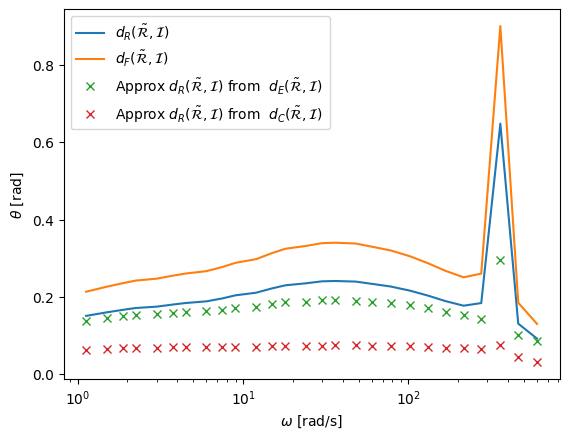

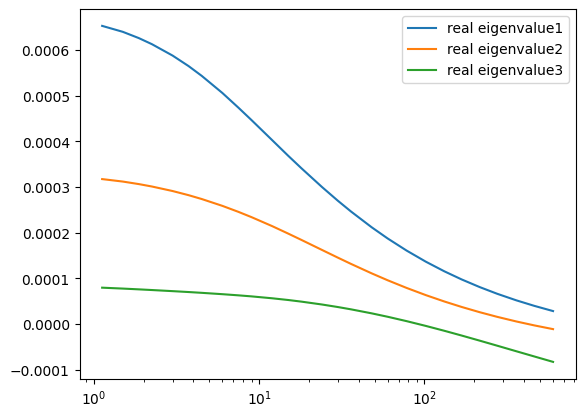

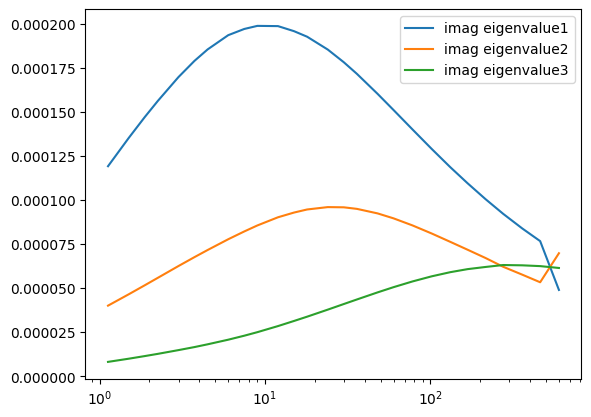

In [5]:
from main import *
SaveRIList=[]
SaveRtilde=[]
MaxOmega=np.max(Frequencies)


print("Opening files from this path = ",directory)

    
TensorArray = np.genfromtxt(directory+'Tensors.csv', dtype=complex, delimiter=', ')
N0 =          np.genfromtxt(directory+'N0.csv', dtype=float, delimiter=',')
Frequencies = np.genfromtxt(directory+'Frequencies.csv', dtype=float, delimiter=', ')

    
Rstore,Istore,Rtildestore, N0store = SplitTensor(TensorArray,Frequencies,N0)
print("found spltting")
# Determine eigenvalue decompositions of N0, R, I, Rtilde (no sorting applied), and their multiplicities
MultRstore, MultIstore, MultRtildestore, MultN0store, URstore, UIstore, URtildestore, UN0store, QRstore, QIstore, QRtildestore, QN0store = EigenValueDecomposition(N0,TensorArray,Frequencies)

# Determine the maximal and minimal angles from QR and QI also output d_F metric for these orderings
FixEvecs="Yes"#"Yes"
MinAnglestoreRI, MaxAnglestoreRI, dFMinAnglestoreRI, dFMaxAnglestoreRI,SortedURstore, SortedUIstore, SortedQRstore, SortedQIstore, SortedKstore = MinMaxthetafromQRQI(Frequencies,QRstore,QIstore,URstore, UIstore,MultRstore,MultIstore,FixEvecs)
SortedMultRstore=[]
SortedMultIstore=[]
print("min max")


# Determine the maximal and minimal angles from QRtilde and QI also output d_F metric for these orderings
MinAnglestoreRtildeI, MaxAnglestoreRtildeI, dFMinAnglestoreRtildeI, dFMaxAnglestoreRtildeI,SortedURtildestore, SortedUIstore, SortedQRtildestore, SortedQIstore, SortedKstore= MinMaxthetafromQRQI(Frequencies,QRtildestore,QIstore,URtildestore, UIstore,MultRtildestore,MultIstore,FixEvecs)
print("min max qr")

# Sort eigenvalues (and eigenvectors) so that || Lambda_Rtilde - Lambda_I || is maximal
sorteigenvalues="MaxDifference"
#SortedMultRstore, SortedMultIstore, SortedMultRtildestore, SortedURstore, SortedUIstore, SortedURtildestore, SortedQRstore, SortedQIstore, SortedQRtildestore = SortEigenValues(MultRstore, MultIstore, MultRtildestore, URstore, UIstore, URtildestore, QRstore, QIstore, QRtildestore, Frequencies)
SortedMultRtildestore, SortedMultIstore, SortedURtildestore, SortedUIstore, SortedQRtildestore, SortedQIstore, SortedKstore = SortEigenValues(MultRtildestore, MultIstore, URtildestore, UIstore, QRtildestore, QIstore, Frequencies, sorteigenvalues, Rtildestore, Istore)
print("sort eigenvalues")
# Obtain angles for this sorted min-max combination
AnglestoreRtildeIsortedmaxdiff = AnglesSortedQRQI(SortedQRtildestore,SortedQIstore,Frequencies)


#Obtain f meauses (approx and exact constant)
#AnglestoreRtildeIfmeasfullconstsortedmaxdiff, AnglestoreRtildeIfmeasapprxconstsortedmaxdiff = Fmeasure(sorteigenvalues,SortedURtildestore, SortedUIstore, SortedQRtildestore, SortedQIstore, SortedKstore, Rtildestore,Istore, Frequencies)
print('Computing F measure Tilde')
AnglestoreRtildeIfmeasfullconstsortedmaxdiff, AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min, AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max, RtildeIfmeasapprx_den_const_max = Fmeasure(sorteigenvalues,SortedURtildestore, SortedUIstore, SortedQRtildestore, SortedQIstore, SortedKstore, Rtildestore,Istore, Frequencies)

#Obtain Com meauses (approx and exact constant)
AnglestoreRtildeIcommeasfullconstsortedmaxdiff, AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min, AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max, RtildeIcommeapprx_den_const_max = Commeasure(sorteigenvalues,SortedURtildestore, SortedUIstore, SortedQRtildestore, SortedQIstore, SortedKstore, Rtildestore,Istore, Frequencies)


# Sort eigenvalues (and eigenvectors) so that || Lambda_R - Lambda_I || is minimal
sorteigenvalues="MinDifference"
#SortedMultRstore, SortedMultIstore, SortedMultRtildestore, SortedURstore, SortedUIstore, SortedURtildestore, SortedQRstore, SortedQIstore, SortedQRtildestore = SortEigenValues(MultRstore, MultIstore, MultRtildestore, URstore, UIstore, URtildestore, QRstore, QIstore, QRtildestore, Frequencies)
SortedMultRtildestore, SortedMultIstore, SortedURtildestore, SortedUIstore, SortedQRtildestore, SortedQIstore, SortedKstore = SortEigenValues(MultRtildestore, MultIstore, URtildestore, UIstore, QRtildestore, QIstore, Frequencies, sorteigenvalues, Rtildestore, Istore)
# Obtain angles for this sorted min-max combination
AnglestoreRtildeIsortedmindiff = AnglesSortedQRQI(SortedQRtildestore,SortedQIstore,Frequencies)

#Obtain f meauses (approx and exact constant)
AnglestoreRtildeIfmeasfullconstsortedmindiff, AnglestoreRtildeIfmeasapprxconstsortedmindiff_min,AnglestoreRtildeIfmeasapprxconstsortedmindiff_max, RtildeIfmeasapprx_den_const_min = Fmeasure(sorteigenvalues,SortedURtildestore, SortedUIstore, SortedQRtildestore, SortedQIstore, SortedKstore, Rtildestore,Istore, Frequencies)

#Obtain com meauses (approx and exact constant)
#AnglestoreRtildeIfmeasfullconstsortedmindiff, AnglestoreRtildeIfmeasapprxconstsortedmindiff = Fmeasure(sorteigenvalues,SortedURtildestore, SortedUIstore, SortedQRtildestore, SortedQIstore, SortedKstore, Rtildestore,Istore, Frequencies)
AnglestoreRtildeIcommeasfullconstsortedmindiff, AnglestoreRtildeIcommeasapprxconstsortedmindiff_min,AnglestoreRtildeIcommeasapprxconstsortedmindiff_max, RtildeIcommeapprx_den_const_min = Commeasure(sorteigenvalues,SortedURtildestore, SortedUIstore, SortedQRtildestore, SortedQIstore, SortedKstore, Rtildestore,Istore, Frequencies)

kthetavec=np.zeros((N,3))
for n in range(N):
    kthetavec[n,0] = -SortedKstore[n,1,2]*MinAnglestoreRtildeI[n]
    kthetavec[n,1] = SortedKstore[n,0,2]*MinAnglestoreRtildeI[n]
    kthetavec[n,2] = -SortedKstore[n,0,1]*MinAnglestoreRtildeI[n]
Figures="On"
if Figures=="On":
    fig=plt.figure()
    plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
    plt.semilogx(Frequencies,dFMinAnglestoreRtildeI,label=r'$d_F(\tilde{\cal R},{\cal I})$')
    plt.semilogx(Frequencies,np.fmin(AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min,AnglestoreRtildeIfmeasapprxconstsortedmindiff_min),'x',label=r'Approx $d_R(\tilde{\cal R},{\cal I})$ from  $d_E(\tilde{\cal R},{\cal I})$ ')
    plt.semilogx(Frequencies,np.fmin(AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min,AnglestoreRtildeIcommeasapprxconstsortedmindiff_min),'x',label=r'Approx $d_R(\tilde{\cal R},{\cal I})$ from  $d_C(\tilde{\cal R},{\cal I})$ ')
    plt.xlabel(r'$\omega$ [rad/s]')
    plt.ylabel(r'$\theta$ [rad]')
    plt.legend()
    plt.savefig(directory+object+"_Rtilde_I.pdf")

    plt.show()

plt.figure()
for n in range(3):
    plt.semilogx(Frequencies,LambdaRtilde[:,n],label="real eigenvalue"+str(n+1))
plt.legend()
plt.savefig(directory+object+"_eigenvalues_Rtilde.pdf")
plt.show()

plt.figure()
for n in range(3):
    plt.semilogx(Frequencies,LambdaI[:,n],label="imag eigenvalue"+str(n+1))
plt.legend()
plt.savefig(directory+object+"_eigenvalues_I.pdf")

plt.show()    